# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 5</p> (Finally the final homework this semester, yay!)
## <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Monday, **Nov 29th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: **Rohitashwa Chakraborty**

EID: **rc47878**

Name: **Sahitya Sundar Raj Vijayanagar**

EID: **sv25849**

# Question 1: Ensembles Conceptual (5 pts)
Briefly describe the concepts of Gradient Boosting in your own words. How does it differ from Adaboost?

## Answer:


Bleh

### AdaBoost:

- Lots of weak learns created. These weak learners are _"stumps"_ i.e: they just have one parent node and 2 children (depth = 1).
- Unlike random forest where the final result is an average of all the individual trees in the forest, the stumps of Ada-boost have different weights associated with them. The net result is a _Weighted Average_ of all the individual trees/stumps 
- Each successive tree/stump is created on top of the previous stump (which is unlike random forest, where each trees grows independently).
- Weights are directly proportional to the log-odds of classification or the gini-index of the split.

# Question 2: SVM (25 pts)

Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression. In this problem, you will be playing with SVM on the sklearn wine dataset to explore the impacts of different parameters.

## Answer:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score

# load data
wine = datasets.load_wine()
# only take the first two features
X = wine.data[:, :2]
y = wine.target

In [2]:
def plot_model(X, y, svc, kernel='linear', gamma = 0.5):
# You don't need to implement this function, this has been implemented and is just for plotting the trained model.

# Input: 
#  - X: data features 
#  - y: the labels
#  - svc: the trained svm.SVC model
#  - kernel: specified kernel type, default value is 'linear'

  x0_min, x0_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  x1_min, x1_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = (x0_max / x0_min)/100
  xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

  plt.subplot(1, 1, 1)
  y_pred = svc.predict(np.c_[xx0.ravel(), xx1.ravel()])
  y_pred = y_pred.reshape(xx0.shape)
  plt.contourf(xx0, xx1, y_pred, cmap=plt.cm.Paired, alpha=0.2)

  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  plt.xlabel('Alcohol')
  plt.ylabel('Malic Acid')
  plt.xlim(xx0.min(), xx0.max())
  plt.title('SVC with {kernel} kernel; gamma = {gamma}'.format(kernel = kernel, gamma= gamma))
  plt.show()
  # return plt

### a) (5 pts)
Implement the `train_model()` function. This function takes as input:

- X (the features)
- y (the labels)
- kernel (the specified kernel type, default value is `'linear'`)
- C (the penalty parameter, default value is 1
)
- gamma (the kernel coefficient, default value is 0.5). 

The `train_model()` function should fit a [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model and return the trained model. After implementing `train_model()`, use the `plot_model()` function provided below to plot the results of your model.

In [3]:
def train_model(X, y, kernel='linear', C=1, gamma=0.5):
  svc = svm.SVC(C= C, kernel= kernel, gamma= gamma)
  svc.fit(X, y)
  return svc

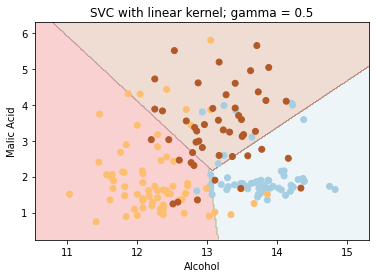

In [4]:
kernel='linear'
gamma = 0.5
svc = train_model(X, y, kernel= kernel, C=1, gamma= gamma)
plot_model(X, y, svc, kernel= kernel, gamma = gamma)

### b) (10 pts)
The `kernel` parameter decides what form the input data will be transformed into, and may affect how your trained SVM model performs. In (a), the default value for `kernel` is `'linear'`, now re-train your svm model as you did in (a), but this time, use `'rbf'` as the `kernel`, while keeping `C=1, gamma=0.5` still. Use the provided `plot_model()` function to plot the results of your model. What do you observe?

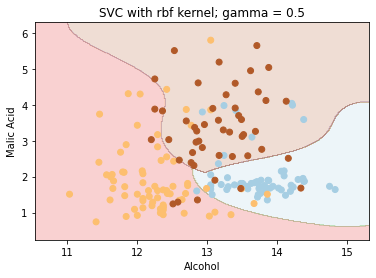

In [5]:
kernel = 'rbf'
svc = train_model(X, y, kernel= kernel)
plot_model(X, y, svc, kernel= kernel)

***
**!!!OBSERVATION?!!!**
***

### c) (10 pts)
The `'gamma'` is a hyper-parameter needed for `'rbf'` kernel, which specifies the width of the Gaussian Kernel. Now experiment with different gamma values `[0.5, 1, 10, 100]`, use `'rbf'` as the `kernel`, while keeping `C=1`. Train your SVM and use the provided `plot_model()` function to plot the results of your model. What do you observe from the plot as gamma increases? 

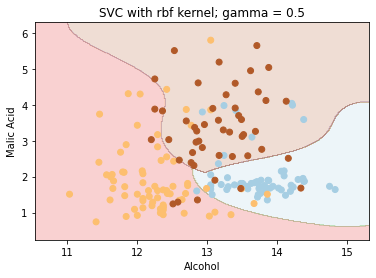

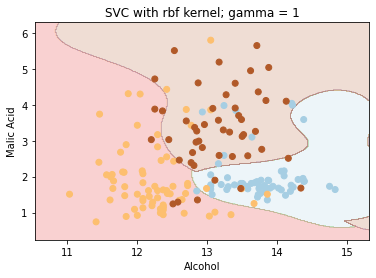

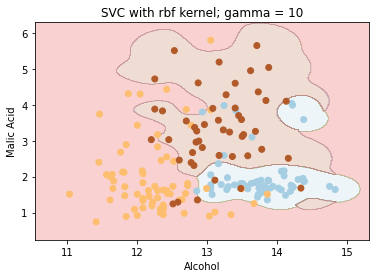

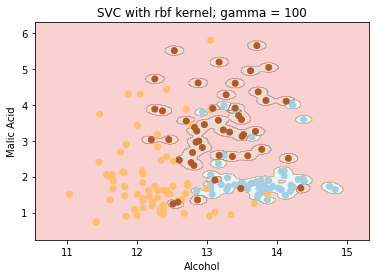

In [6]:
kernel = 'rbf'

for idx, gamma in enumerate([0.5, 1, 10, 100]):
    svc = train_model(X, y, kernel= kernel, gamma = gamma)
    plot_model(X, y, svc, kernel= kernel, gamma= gamma)

***
**!!!OBSERVATION?!!!**
***

# Question 3: Ensemble methods for classification (25 pts)

In this question, we will compare the performances of different ensemble methods for classification: Bagging, AdaBoost, GradientBoosting. 

The dataset used is [Spam Classification Data](https://archive.ics.uci.edu/ml/datasets/Spambase), which you can load from `spam_uci.csv` file. The last column represents the target label, where 1 means spam and 0 otherwise. You can use the provided codes to load the data and split training/test sets.

## Answer:

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

data = pd.read_csv('spam_uci.csv', index_col=0)
print(data.shape)

X = data.iloc[:, :56]
y = data.iloc[:, 57]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(4601, 58)


### a) (5 pts)
Fit a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with `random_state=10`,  and a [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with `random_state=10` and `solver="newton-cg"` for the spam classification problem. For each classifier, report the [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on the test data. 
**Note**: Before computing roc_auc_score, you will need [`predict_proba(X_test)[:, 1]`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) to obtain the predicted target scores first.

In [8]:
def decision_tree(random_state: int = 10)-> DecisionTreeClassifier:
    mdl = DecisionTreeClassifier(random_state= random_state)
    mdl.fit(X = X_train, y= y_train)
    return mdl

In [9]:
def logistic_regression(random_state: int = 10, solver: str = "newton-cg")-> LogisticRegression:
    mdl = LogisticRegression(random_state= random_state, solver= solver)
    mdl.fit(X= X_train, y = y_train)
    return mdl

In [10]:
def get_metrics(model: object, verbose:bool = True)-> None:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    y_score = model.predict_proba(X_test)[:,1] # probability of being 1
    roc_auc = roc_auc_score(y_test, y_score)
    if verbose:
        print("Accuracy Score:", accuracy)
        print("ROC- AUC Score", roc_auc)
    return accuracy, roc_auc

In [11]:
print("\tDecision Tree Classifier")
dtree = decision_tree()
get_metrics(model = dtree)
print("\n")

print("\tLogistic Regression Classifier")
logreg = logistic_regression()
get_metrics(model = logreg)

	Decision Tree Classifier
Accuracy Score: 0.9098090849242922
ROC- AUC Score 0.9040453749567611


	Logistic Regression Classifier
Accuracy Score: 0.9315339038841343
ROC- AUC Score 0.9734682742610166


(0.9315339038841343, 0.9734682742610166)

### b) (5 pts)
For **each** classifier in (a), use [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) to create an ensemble of 50 classifiers (i.e `n_estimators=50`) with `random_state=10`, report the accuracy_score and roc_auc_score on the test data. Compare the scores with what you obtained in (a), briefly describe the impact of Bagging on both classifiers.

In [12]:
def bagging_classifier(base: object, n_estimators = 50, random_state = 10):
    bagged_model = BaggingClassifier(base_estimator= base, n_estimators= n_estimators, random_state = random_state)
    bagged_model.fit(X= X_train, y= y_train)
    return bagged_model

In [13]:
print("\tBagged Decision Tree Classifier")
bag_dtree = bagging_classifier(dtree)
get_metrics(bag_dtree)
print("\n")

print("\tBagged Logistic Regression Classifier")
bag_logreg = bagging_classifier(logreg)
get_metrics(bag_logreg)

	Bagged Decision Tree Classifier
Accuracy Score: 0.9368005266622779
ROC- AUC Score 0.9796839729119637


	Bagged Logistic Regression Classifier
Accuracy Score: 0.934167215273206
ROC- AUC Score 0.97552769248874


(0.934167215273206, 0.97552769248874)

***
**!!!Describe Impact!!!**
***

### c) (5 pts)
Fit a [Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for the spam classification problem. Use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best combination of hyperparameters from `{"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}`. As what you did in (a), report the accuracy_score and roc_auc_score on the test data.

In [14]:
def random_forest_classifier(n_estimators: int = 10, criterion: str = "gini", random_state = 42):
    model = RandomForestClassifier(n_estimators = n_estimators, criterion= criterion, random_state = random_state)
    model.fit(X_train, y_train)
    return model

In [24]:
def grid_search_cv(base: object, parameters: dict):
    model = GridSearchCV(base, parameters)
    model.fit(X= X_train, y = y_train)
    return model

In [23]:
random_forest_model = random_forest_classifier()
grid_random_forest = grid_search_cv(random_forest_model, {"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]})

get_metrics(grid_random_forest)

Accuracy Score: 0.9552337063857801
ROC- AUC Score 0.9891234188838844


(0.9552337063857801, 0.9891234188838844)

### d) (6 pts)
Fit a [GradientBoosting Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and an [AdaBoost Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for the spam classification problem. Use GridSearchCV to find the best combination of hyperparameters for each classifier: 
- For GradientBoosting, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}`;
- For AdaBoost, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}`. 

Report the accuracy_score and roc_auc_score on the test data for each classifier. The GridSearchCV may take some time, especially for GradientBoostingClassifier.

In [25]:
print("\tGradient Boosting Classifier")
grad_boost = GradientBoostingClassifier()
grid_search_grad_boost = grid_search_cv(grad_boost, {"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]})
get_metrics(grid_search_grad_boost)
print("\n")

print("\tAda Boost Classifier")
ada_boost = AdaBoostClassifier()
grid_search_ada_boost = grid_search_cv(ada_boost, {"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]})
get_metrics(grid_search_ada_boost)

	Gradient Boosting Classifier
Accuracy Score: 0.9552337063857801
ROC- AUC Score 0.9889094533537314


\Ada Boost Classifier
Accuracy Score: 0.9512837393021725
ROC- AUC Score 0.9858836241481498


(0.9512837393021725, 0.9858836241481498)

### e) (4 pts)
In (c) and (d), you have obtained the best combination of hyperparameters respectively for Random Forest Classifier, Gradient Boosting Classifier and AdaBoost Classifier. 

Please use the best hyperparameters to initialize your classifiers, train your model, compute the accuracy_score and roc_auc_score on the test data, and plot the `accuracy_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in one plot, and plot the `roc_auc_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in another plot. That is, keep all other hyperparameters (except for `n_estimators`) as the best hyperparameters you obtained in (c) and (d), plot how the accuracy_score and roc_auc_score changes as you change the number of estimators (`n_estimators`).


In [34]:
grid_search_ada_boost.best_params_

n_estimators = pd.Series([10,100, 500], name= "n_estimators")
accuracy = pd.DataFrame(columns= n_estimators)
roc_auc = pd.DataFrame(columns= n_estimators)

for estimator_count in n_estimators:
    # Random Forest classifier
    mdl = random_forest_classifier(n_estimators = estimator_count, criterion = grid_random_forest.best_params_['criterion'])
    accuracy.loc["Random Forest Classifier", estimator_count], roc_auc.loc["Random Forest Classifier", estimator_count] = get_metrics(model = mdl, verbose = False)

    # Gradient Boosting classifier
    mdl = GradientBoostingClassifier(
                                n_estimators = estimator_count,
                                learning_rate= grid_search_grad_boost.best_params_['learning_rate'],
                                max_depth= grid_search_grad_boost.best_params_['max_depth'],
                                random_state= grid_search_grad_boost.best_params_['random_state'],
                                subsample= grid_search_grad_boost.best_params_['subsample']
                            )
    mdl.fit(X = X_train, y= y_train)
    accuracy.loc["Gradient Boosting Classifier", estimator_count], roc_auc.loc["Gradient Boosting Classifier", estimator_count] = get_metrics(model = mdl, verbose = False)

    # AdaBoost classifier
    mdl = AdaBoostClassifier(
                        n_estimators = estimator_count,
                        learning_rate= grid_search_ada_boost.best_params_['learning_rate'],
                        random_state= grid_search_ada_boost.best_params_['random_state'],
                    )
    mdl.fit(X = X_train, y= y_train)
    accuracy.loc["AdaBoost Classifier", estimator_count], roc_auc.loc["AdaBoost Classifier", estimator_count] = get_metrics(model = mdl, verbose = False)


n_estimators,10,100,500
Random Forest Classifier,0.945359,0.95655,0.955234
Gradient Boosting Classifier,0.895326,0.950625,0.955234
AdaBoost Classifier,0.844635,0.940092,0.951284


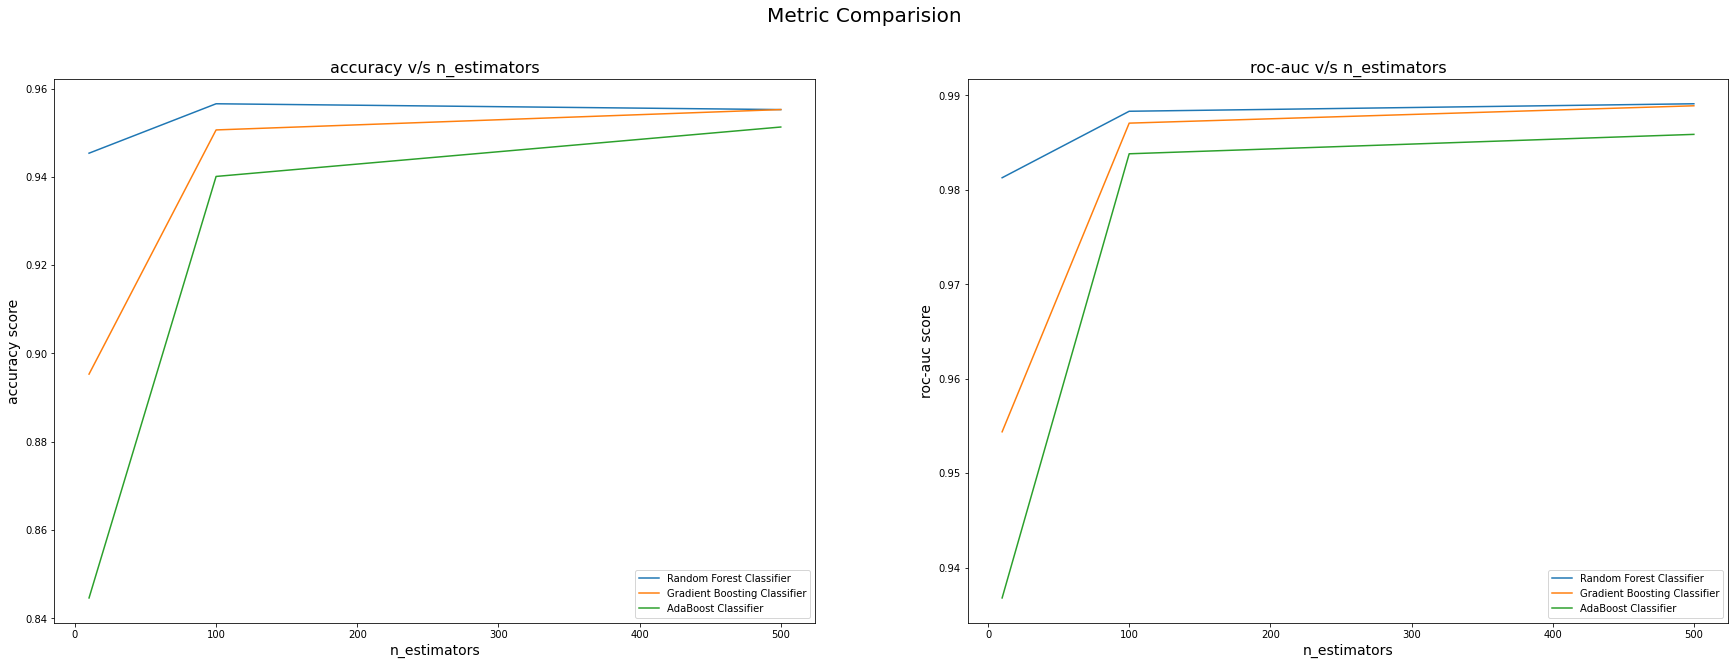

In [49]:
fig, ax = plt.subplots(1,2, sharex= True, sharey=False)
fig.set_size_inches(30, 10,  forward=True)

ax[0].plot(accuracy.T)
ax[0].legend(accuracy.index)
ax[0].set_xlabel('n_estimators', fontsize = '14')
ax[0].set_ylabel('accuracy score', fontsize = '14')
ax[0].set_title("accuracy v/s n_estimators", fontsize = '16')

ax[1].plot(roc_auc.T)
ax[1].legend(roc_auc.index)
ax[1].set_xlabel('n_estimators', fontsize = '14')
ax[1].set_ylabel('roc-auc score', fontsize = '14')
ax[1].set_title("roc-auc v/s n_estimators", fontsize = '16')

plt.suptitle("Metric Comparision", fontsize = 20)
plt.show()